<a href="https://colab.research.google.com/github/djeannie29/cafe_dados_codigo/blob/main/classificacao/SVM_COMENTADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

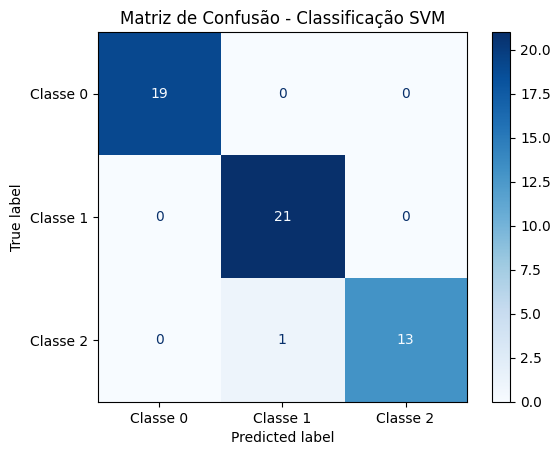

In [1]:
# Importação de bibliotecas essenciais
import numpy as np                      # Para operações numéricas
import pandas as pd                    # Para manipulação de dados em formato tabular
import matplotlib.pyplot as plt        # Para visualização de gráficos
from sklearn.datasets import load_wine # Carrega o dataset Wine pronto do Scikit-learn
from sklearn.model_selection import train_test_split  # Para dividir os dados em treino e teste
from sklearn.svm import SVC            # SVC = Support Vector Classifier (classificação com SVM)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Para avaliação do modelo
from sklearn.preprocessing import StandardScaler  # Para padronização dos dados (muito importante para SVM)

# Carrega o dataset Wine como um DataFrame do pandas
data = load_wine(as_frame=True)
df = data.frame  # Dataset em formato de tabela (DataFrame)

# Separa as variáveis independentes (X) e a variável alvo (y)
X = df.drop(columns=["target"])  # Remove a coluna 'target' e guarda o resto como X (características químicas do vinho)
y = df["target"]                 # 'target' indica o tipo do vinho (0, 1 ou 2)

# Divide os dados em treino (70%) e teste (30%)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
# random_state garante que a divisão seja sempre a mesma (reprodutível)

# Padroniza os dados para que todas as variáveis tenham média 0 e desvio padrão 1
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)  # Ajusta nos dados de treino e transforma
X_te_scaled = scaler.transform(X_te)      # Usa a mesma transformação no conjunto de teste

# Cria o modelo SVC (classificação com SVM)
# kernel='rbf' permite capturar relações não-lineares
# C controla o quanto o modelo tenta acertar tudo (quanto maior, mais rígido)
# gamma define a influência de cada ponto (com 'scale', ele é ajustado automaticamente)
model = SVC(kernel='rbf', C=100, gamma='scale')

# Treina o modelo nos dados de treino padronizados
model.fit(X_tr_scaled, y_tr)

# Faz previsões usando os dados de teste
pred_class = model.predict(X_te_scaled)

# Gera a matriz de confusão comparando as classes reais com as previstas
cm = confusion_matrix(y_te, pred_class)

# Exibe a matriz de confusão com rótulos legíveis para cada classe
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[f"Classe {i}" for i in sorted(np.unique(y))]  # Rótulos: Classe 0, Classe 1, Classe 2
)
disp.plot(cmap="Blues", values_format="d")  # Usa cores e exibe os valores como números inteiros
plt.title("Matriz de Confusão - Classificação SVM")  # Título do gráfico
plt.show()  # Mostra o gráfico
